<a href="https://colab.research.google.com/github/sarahhasan1212/DataScienceProject1/blob/main/SupervisedModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Linear Model

In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Grades.csv to Grades.csv


In [4]:
df_grades = pd.read_csv('Grades.csv')
pd.set_option('display.max_rows', None)
print(df_grades)

              ID  Week2_Quiz1  Week3_MP1  Week3_PR1  Week5_MP2  Week5_PR2  \
0      ML-2020-1         5.00      15.00        5.0      16.09       5.00   
1      ML-2020-2         3.33      15.00        5.0      17.83       5.00   
2      ML-2020-3         1.67      13.00        5.0      15.22       5.00   
3      ML-2020-4         2.50      14.00        5.0      10.00       5.00   
4      ML-2020-6         0.00      15.00        5.0      12.17       4.93   
5      ML-2020-7         3.33      14.00        5.0      14.78       5.00   
6      ML-2020-8         0.00       0.00        0.0       0.00       0.00   
7     ML-2020-11         5.00      15.00        5.0      20.00       5.00   
8     ML-2020-13         0.00      13.00        5.0      20.00       5.00   
9     ML-2020-14         5.00      12.00        5.0      12.17       5.00   
10    ML-2020-16         0.00       0.00        0.0       0.00       0.00   
11    ML-2020-17         3.33       0.00        0.0       0.00       0.00   

Missing values in each column:
 ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64


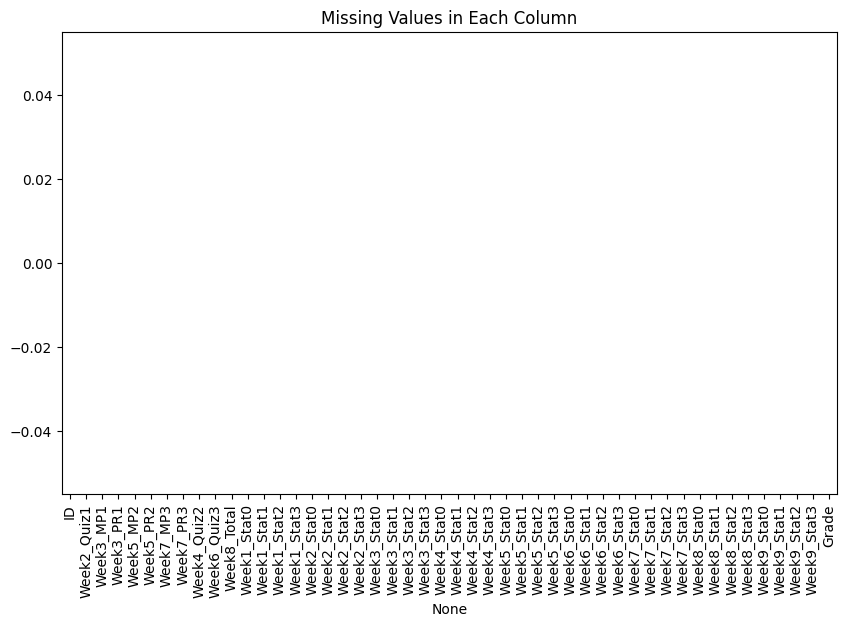

In [5]:
null_data = df_grades.isnull().sum()
print("Missing values in each column:\n", null_data)
plt.figure(figsize=(10, 6))
sns.barplot(x=null_data.index, y=null_data.values)
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.show()

In [7]:
df_grades_numeric = df_grades.drop(columns=['ID'])
corr_matrix = df_grades_numeric.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold) and column != 'Grade']

data_reduced = df_grades_numeric.drop(columns=to_drop)

print(f"Dropped features due to high correlation: {to_drop}")

Dropped features due to high correlation: ['Week3_PR1', 'Week5_PR2', 'Week8_Total']


In [9]:
print("Column names of data_reduced:")
print(data_reduced.columns.tolist())


Column names of data_reduced:
['Week2_Quiz1', 'Week3_MP1', 'Week5_MP2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade']


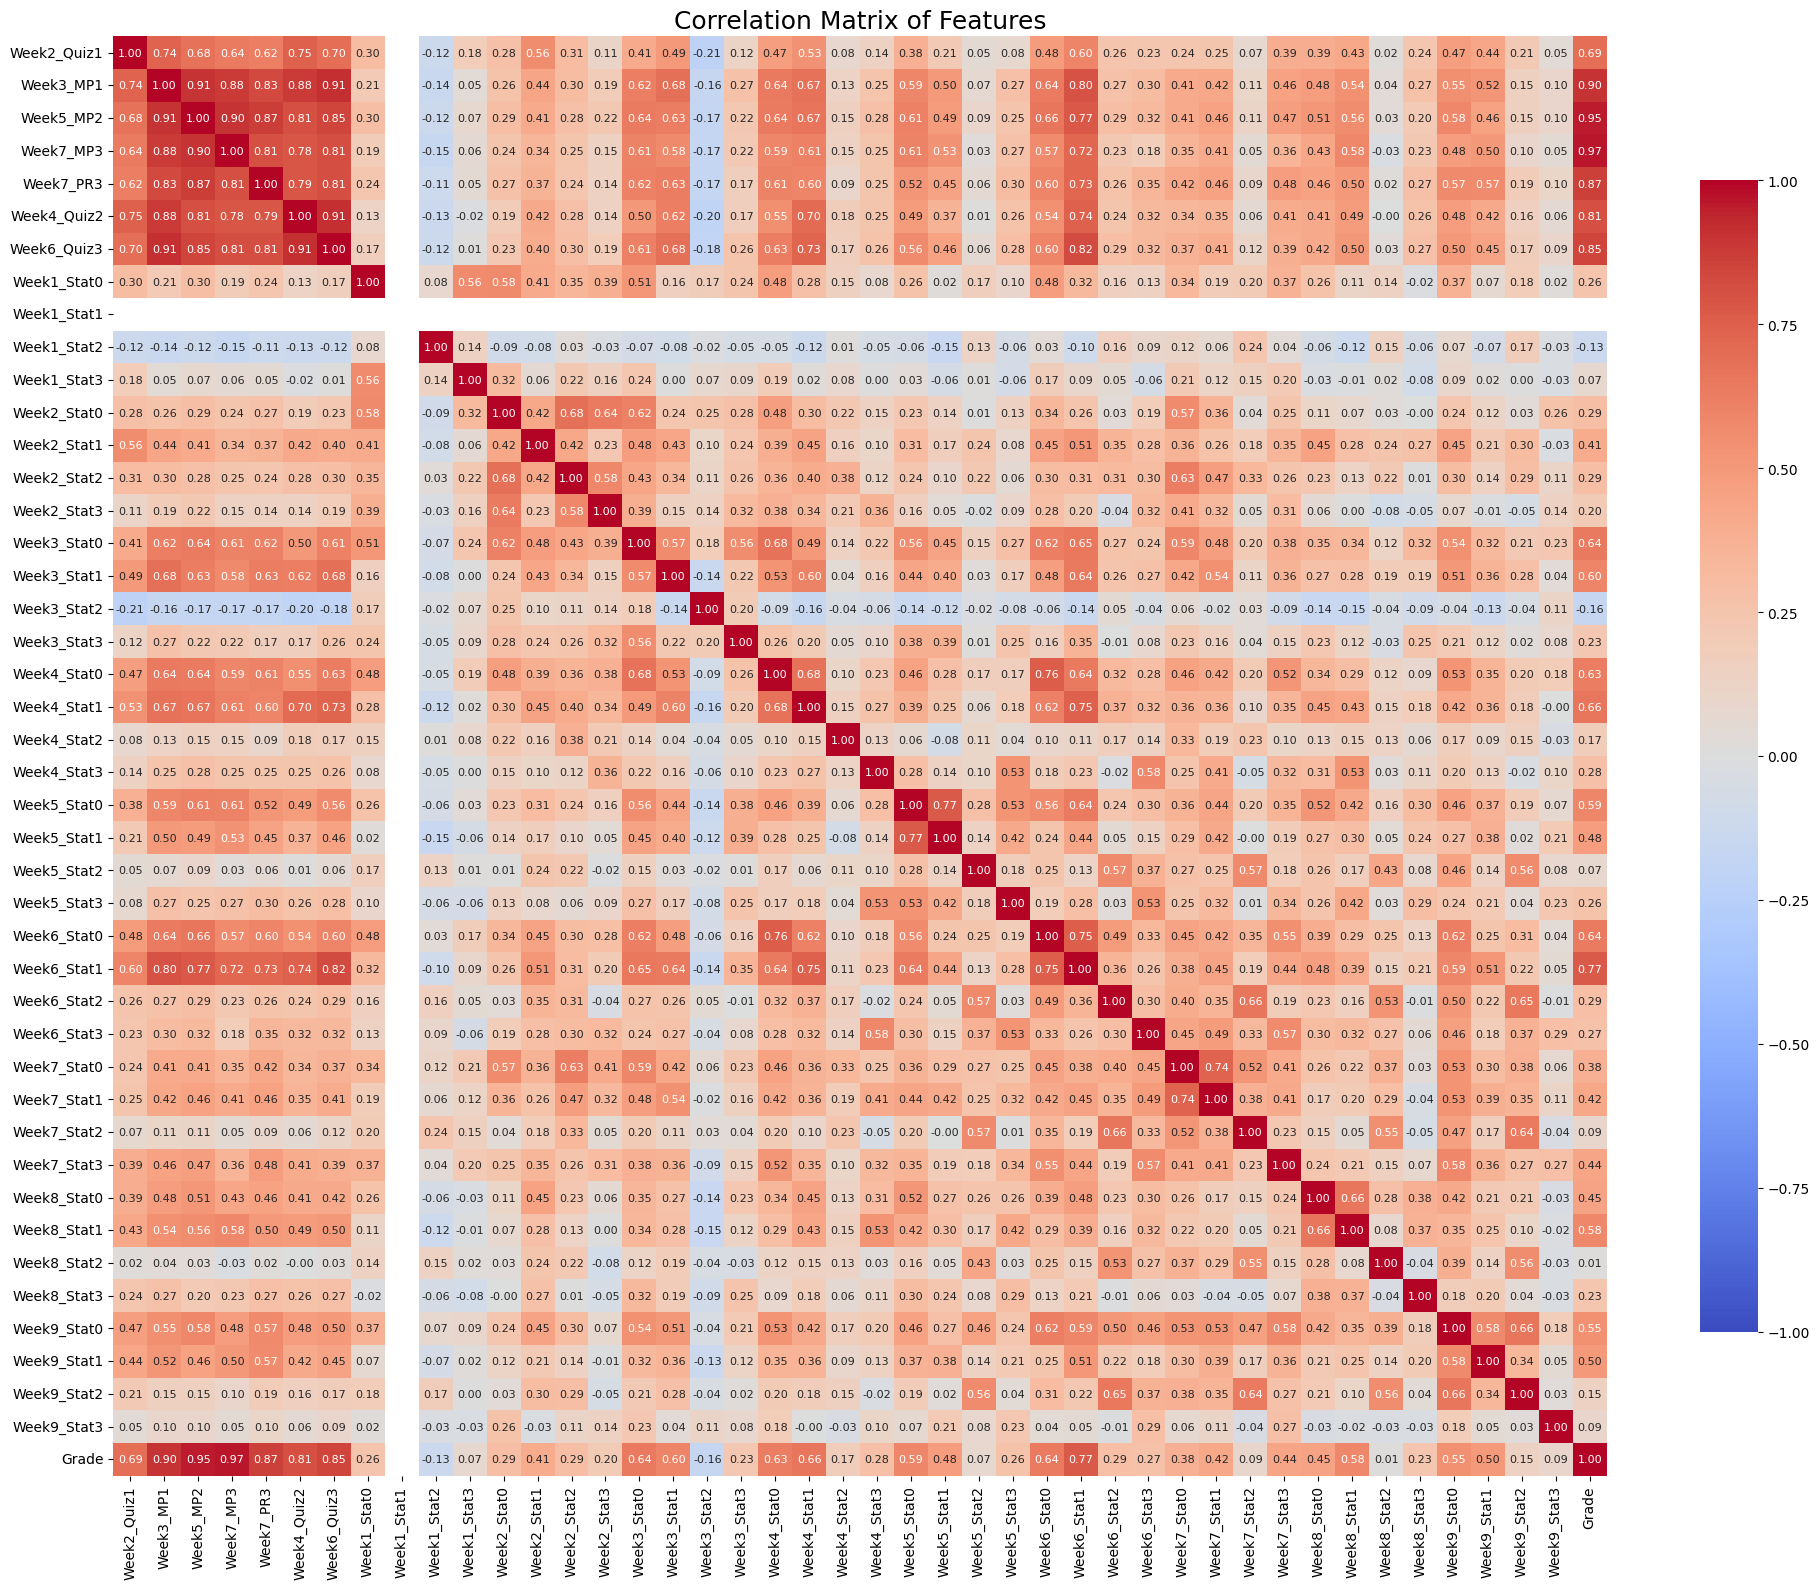

Dropped columns based on correlation: ['Grade', 'Grade']
     Week2_Quiz1  Week3_MP1  Week5_MP2  Week7_MP3  Week7_PR3  Week4_Quiz2  \
0           5.00      15.00      16.09      21.88        5.0         5.00   
1           3.33      15.00      17.83      22.27        5.0         4.00   
2           1.67      13.00      15.22      27.05        2.5         5.00   
3           2.50      14.00      10.00      31.02        5.0         3.13   
4           0.00      15.00      12.17      15.91        5.0         4.67   
5           3.33      14.00      14.78      15.51        5.0         4.67   
6           0.00       0.00       0.00       0.00        0.0         0.00   
7           5.00      15.00      20.00      35.00        5.0         4.71   
8           0.00      13.00      20.00      34.60        5.0         2.71   
9           5.00      12.00      12.17      24.66        5.0         4.67   
10          0.00       0.00       0.00       0.00        0.0         0.00   
11          3.33   

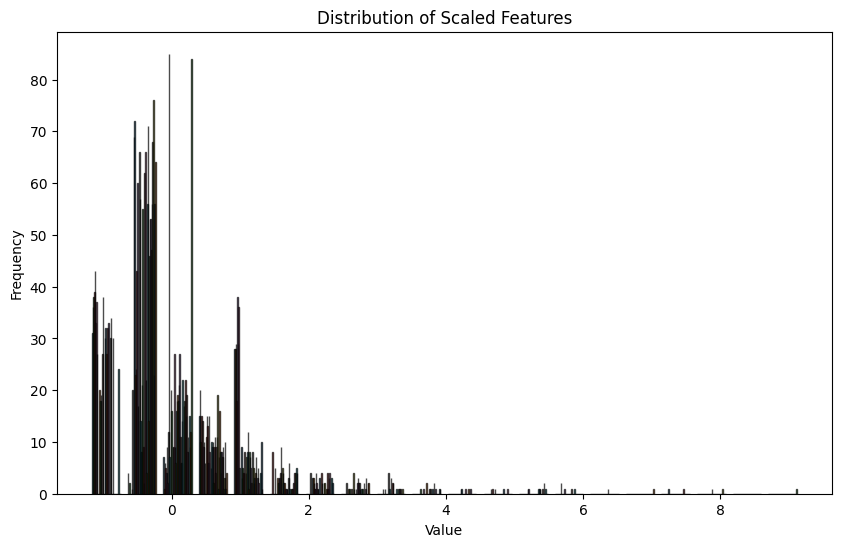

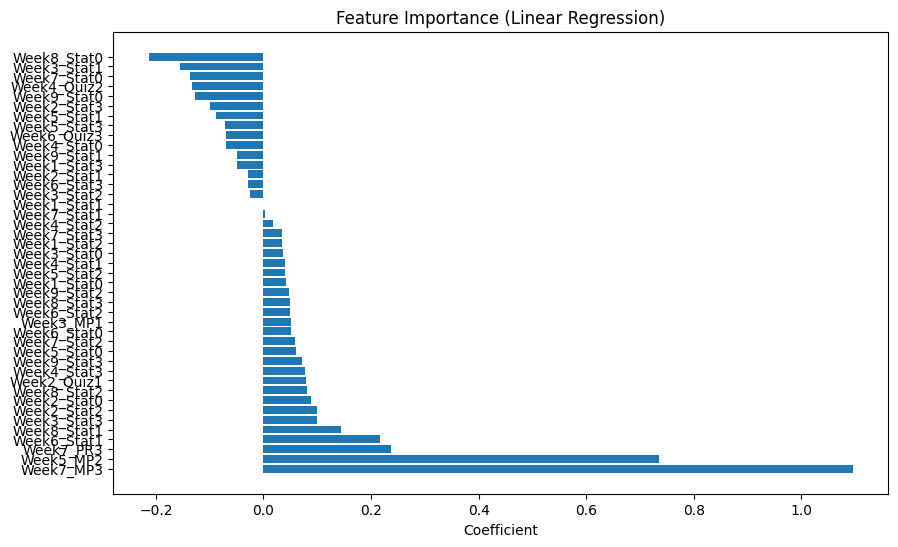

Mean Squared Error (MSE): 0.31
R-squared (R²) Score: 0.93


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

corr_matrix = data_reduced.corr()

#visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={"shrink": .8}, annot_kws={"size": 8})
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.tight_layout()
plt.show()

threshold = 0.95

to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.append(colname)


X = data_reduced.drop(columns=to_drop)
y = data_reduced['Grade']

print("Dropped columns based on correlation:", to_drop)
print(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualize the Feature Scaling
plt.figure(figsize=(10, 6))
plt.hist(X_train_scaled, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Scaled Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'])

plt.xlabel('Coefficient')
plt.title('Feature Importance (Linear Regression)')
plt.show()

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

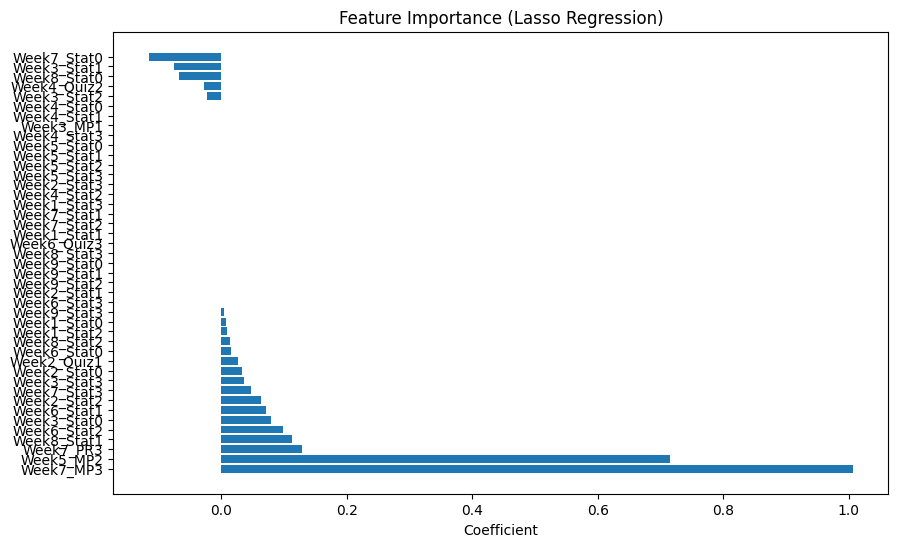

Mean Squared Error (Lasso): 0.20820220215610685
R-squared (Lasso): 0.950530257317842


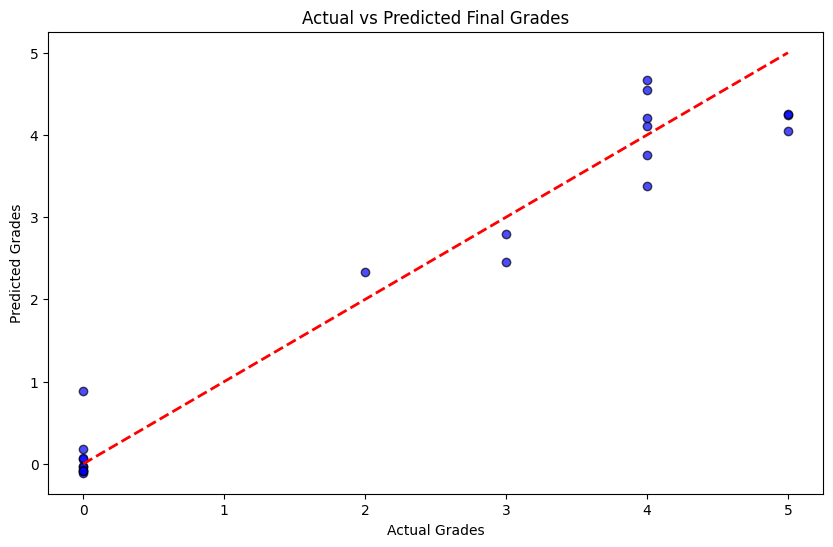

In [14]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Get coefficients from the Lasso model
lasso_coefficients = lasso_model.coef_

# Create a DataFrame for visualization of Lasso coefficients
lasso_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})
lasso_feature_importance_df = lasso_feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Plot Lasso feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(lasso_feature_importance_df['Feature'], lasso_feature_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance (Lasso Regression)')
plt.show()


y_pred = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors='k', c='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Final Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.show()
